# There are 2 goals with these plots:
### Goal 1: Plot the frequency of variants. -> density plot tracks
### Goal 2: Plot the BP_size distribution of variants. -> track points plot tracks

In [1]:
module avail


---------- /software/OSutils/modules-4.4.1/share/Modules/modulefiles -----------
1SynChro/1.15
3d-dna/180922
A5-miseq/20160825
abyss/2.0.2
abyss/2.1.0
abyss/2.1.1
abyss/2.1.2
abyss/2.1.3
abyss/2.1.4
abyss/2.1.5
adapterremoval/2.2.2
AfterQC/0.9.1
AfterQC/0.9.5
allpathslg/44837
allpathslg/44913
allpathslg/49722
allpathslg/50191
allpathslg/52488
amos/3.1.0
angsd/0.913
angsd/0.917
angsd/0.917-116-g5d087b2
angsd/0.918
angsd/0.919
angsd/0.921
angsd/0.922
angsd/0.923
angsd/0.925
angsd-wrapper/7224db2
anytag/2.5.2
apsim/7.10-r49ace54f9c8a670190aef9d8d0fb9d5477bb1534
apsim/7.9-r4047
apsimx/2018.01.30.2253
apsimx/2018.09.28.3099
apsimx/2019.01.08.3392
apsimx/2019.04.03.3693
apsimx/2019.06.05.3920
apsimx/2019.07.18.4025
apsimx/2019.10.04.4236
apsimx/2020.04.09.5012
apsimx/2020.08.04.5350
apsimx/2020.10.21.5755
apsimx/2020.11.27.5887
arcs/1.0.6
art/MountRainier
aspera-cli/3.7.2.354.010c3b8
assemblathon_stats/14dfdab
assemblathon_stats/2011_10_13
asub/2.1
asub/2.2
augustus/3.2.2
augustus/3.3
augus

perl/5.12.5
perl/5.12.5-thread-multi
perl/5.14.4
perl/5.14.4-thread-multi
perl/5.16.3
perl/5.16.3-thread-multi
perl/5.18.4
perl/5.20.3
perl/5.20.3-thread-multi
perl/5.22.2
perl/5.22.2-thread-multi
perl/5.24.0
perl/5.24.0-thread-multi
perl/5.24.1
perl/5.24.1-thread-multi
perl/5.26.0
perl/5.26.0-thread-multi
perl/5.28.0
perl/5.28.0-thread-multi
perl/5.30.2
perl/5.30.2-thread-multi
perl/5.8.9
perl/5.8.9-thread-multi
perl/bio-extras
perl/bio-extras-5.24.0-legacy
perl/core
perl/ensembl
perl/jupyterhub
perlbrew/0.76
pfr-python2/2.7.13
pfr-python3/3.6.1
pfr-python3/3.6.5
pfr-python3/3.6.6
phylip/3.696
phylobayes/4.1c
PhyloSift/1.0.1
picard-tools/1.112
picard-tools/1.79
picard-tools/2.10.1
picard-tools/2.18.7
picard-tools/2.2.4
picard-tools/2.9.4
picrust2/2.3.0
pilon/1.18
pilon/1.20
pilon/1.23
pinfish/0.1.0
platanus/1.2.4
platanus_trim/1.0.7
Platypus/0.8.1
plink/1.07
plink/1.90b6.5
plink2/v2.00a2lm
plncpro/1.1
popoolation2/1201
porechop/0.2.3
portcullis/1.1.0
portcullis/1.1.1
portcullis/1.1.2


# Make genome file

In [4]:
out=/workspace/hramzr/2_Phd_PROJECT/plotting/
fai=/powerplant/workspace/hramzr/2_Phd_PROJECT/snapper_genome/Chrysophrys_auratus.v.1.0.chromosomes.male.map.fasta.fai
cat  $fai | \
awk -v OFS='\t' {'print $1,$2'} >chromosomefile.genome

# Make bedfile for ideogram

In [7]:
module load bedtools
ref=/powerplant/workspace/hramzr/2_Phd_PROJECT/snapper_genome/Chrysophrys_auratus.v.1.0.chromosomes.male.map.fasta
bedtools makewindows -w 10000 -g chromosomefile.genome > 100kb_windows.bed

# Make bedfile for density tracks and size tracks
#### First extract the individuals used for growth prediction

In [99]:
cat /workspace/hramzr/2_Phd_PROJECT/variant_dataframes/Merged_variant_phenotype_data/SV_growth_50kb_1kb_5 | tail -n+2 | awk '{print $1}' | uniq \
| awk '{if(length($1)<9){print 0$0} else {print $0}}'>indvs_growth

In [2]:
module load bedtools
indvs=$(cat indvs_growth)
out=/workspace/hramzr/2_Phd_PROJECT/plotting/bedfiles_growth
for indv in $indvs
do
mdir=/workspace/hramzr/2_Phd_PROJECT/VarCallingWGS/parliament2_calling/${indv}/outputs/
cat ${mdir}${indv}_q20.combined.genotyped.vcf | egrep -v "#" | egrep "<DEL>" | awk '{print substr($1,4), $2, $8}'| \
awk -F ";" '{print $1, substr($7,5),substr($3,8)}' | awk '{if ($5<10000 && $5>5)print $0}' | awk '{print $1,$2,$4, ($5)/10000}' \
| tr " " "\t" | sort -k1,1 -k2,2n>${out}/dels.bed

cat ${mdir}${indv}_q20.combined.genotyped.vcf | egrep -v "#" | egrep "<INS>" | awk '{print substr($1,4), $2, $8}'| \
awk -F ";" '{print $1, substr($7,5),substr($3,8)}' | awk '{if ($5<10000 && $5>5)print $0}' | awk '{print $1,$2,$4, ($5)/10000}' \
| tr " " "\t" | sort -k1,1 -k2,2n>${out}/ins.bed

cat ${mdir}${indv}_q20.combined.genotyped.vcf | egrep -v "#" | egrep "<INV>" | awk '{print substr($1,4), $2, $8}'| \
awk -F ";" '{print $1, substr($7,5),substr($3,8)}' | awk '{if ($5<10000 && $5>5)print $0}' | awk '{print $1,$2,$4, ($5)/10000}' \
| tr " " "\t" | sort -k1,1 -k2,2n>${out}/invs.bed

cat ${mdir}${indv}_q20.combined.genotyped.vcf | egrep -v "#" | egrep "<DUP>" | awk '{print substr($1,4), $2, $8}'| \
awk -F ";" '{print $1, substr($7,5),substr($3,8)}' | awk '{if ($5<10000 && $5>5)print $0}' | awk '{print $1,$2,$4, ($5)/10000}' \
| tr " " "\t" | sort -k1,1 -k2,2n>${out}/dups.bed
done

# Include significant regions

In [2]:
cat topscores.txt | tr "," "\n" | tr -d "''" | tr -d "[]" | tr -d "dups|dels|invs|ins" | tr "_" "  " | awk '{print $1, $2, ($2+50000)}' \
| sort -k1,1 -k2,2n>topregions



ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: cat topscores.txt
        ^


## Density/size plot for SVs

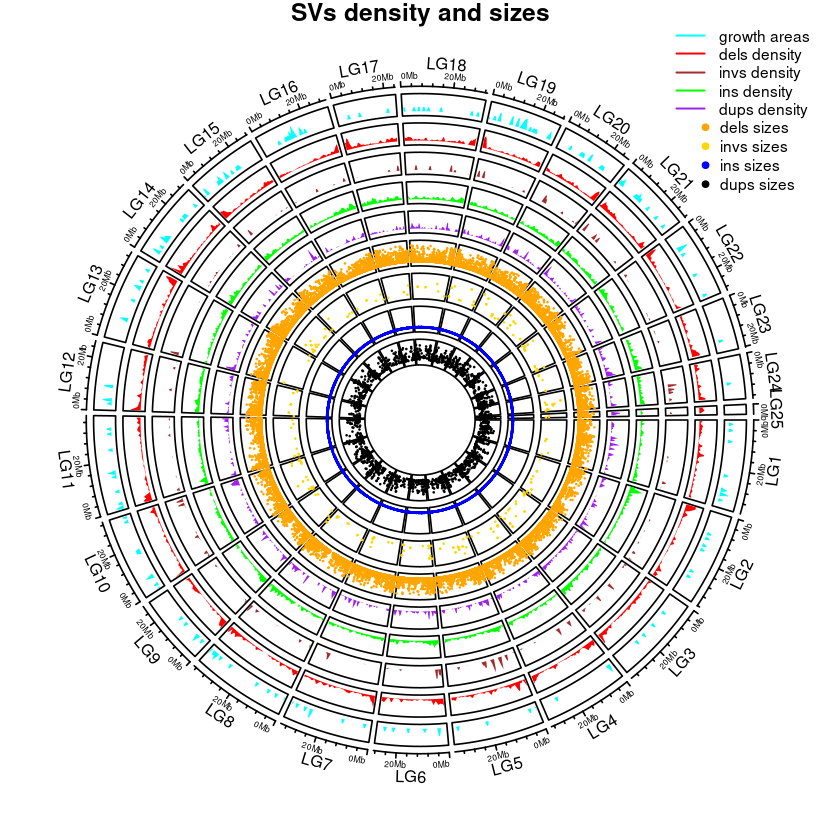

In [2]:
library(circlize)
library(data.table)
library(dplyr)
circos.par("track.height" = 0.07, canvas.xlim = c(-1.0, 1.0), canvas.ylim = c(-1.0, 1.0))
chromosomes <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/100kb_windows.bed")

dels <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/bedfiles_growth/dels.bed")

ins <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/bedfiles_growth/ins.bed")

dups <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/bedfiles_growth/dups.bed")

invs <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/bedfiles_growth/invs.bed")

sign <- fread("/workspace/hramzr/2_Phd_PROJECT/plotting/topscoring_regions")

sign <- sign
circos.genomicInitialize(chromosomes)

circos.genomicDensity(sign, col = c("cyan"), track.height = 0.06)

circos.genomicDensity(dels, col = c("red"), track.height = 0.06) # red

circos.genomicDensity(invs, col = c("brown"), track.height = 0.06) # red

circos.genomicDensity(ins, col = c("green"), track.height = 0.06) # red

circos.genomicDensity(dups, col = c("purple"), track.height = 0.06) # red

circos.track(ylim = c(0, 1))

circos.trackPoints(dels$V1, dels$V2, dels$V4, cex=0.005, c="orange")

circos.track(ylim = c(0, 1))

circos.trackPoints(invs$V1, invs$V2, invs$V4, cex=0.0005, c="gold")

circos.track(ylim = c(0, 1))

circos.trackPoints(ins$V1, ins$V2, ins$V4, cex=0.005, c="blue")

circos.track(ylim = c(0, 1))

circos.trackPoints(dups$V1, dups$V2, dups$V4, cex=0.005, c="black")

title("SVs density and sizes")
legend(0.74, 0.85,legend=c("dels sizes",  "invs sizes", "ins sizes", "dups sizes"),
       col=c("orange", "gold", "blue", "black"),cex=0.75,pch=c(16,16), bty='n')
legend(0.66,0.9,legend="dups density",col="purple",lty=1,cex=0.75,lwd=1.2,bty='n')
legend(0.66,0.95,legend="ins density",col="green",lty=1,cex=0.75,lwd=1.2,bty='n')
legend(0.66,1.0,legend="invs density",col="brown",lty=1,cex=0.75,lwd=1.2,bty='n')
legend(0.66,1.05,legend="dels density",col="red",lty=1,cex=0.75,lwd=1.2,bty='n')
legend(0.66,1.10,legend="growth areas",col="cyan",lty=1,cex=0.75,lwd=1.2,bty='n')
par(xpd=TRUE)
circos.clear()